<a id='table_of_contents'></a>

0. [Import libraries](#imports)
1. [Import data](#import_data)
2. [Data exploration](#data_exploration)
3. [Data cleaning](#data_cleaning)
4. [Data preparation](#data_preparation)
5. [Benchmark model](#benchmark_model)<br>
6. [Feature engineering](#feature_engineering)

# 0. Import libraries <a id='imports'></a>
[Back to top](#table_of_content)

In [39]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# 1. Import data <a id='imports_data'></a>
[Back to top](#table_of_content)

In [40]:
taxi_jan_2024 = pd.read_parquet(r'C:\Users\danie\Machine_Learning\datasets\yellow_tripdata_2024-01.parquet')
taxi_data = pd.concat([taxi_jan_2024])
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


# 2. Data exploration <a id='data_exploration'></a>
[Back to top](#table_of_content)

In [41]:
taxi_data.shape

(2964624, 19)

In [42]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [43]:
taxi_data = taxi_data[['tpep_pickup_datetime', 'tpep_dropoff_datetime',  'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type',  'total_amount']]
taxi_data[taxi_data['passenger_count'].isna()].shape

(140162, 9)

In [44]:
taxi_data[taxi_data['payment_type'] == 0].shape

(140162, 9)

In [45]:
taxi_data = taxi_data[taxi_data['payment_type'] != 0]
taxi_data['passenger_count'].isna().sum()

0

In [46]:
taxi_data.shape

(2824462, 9)

array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

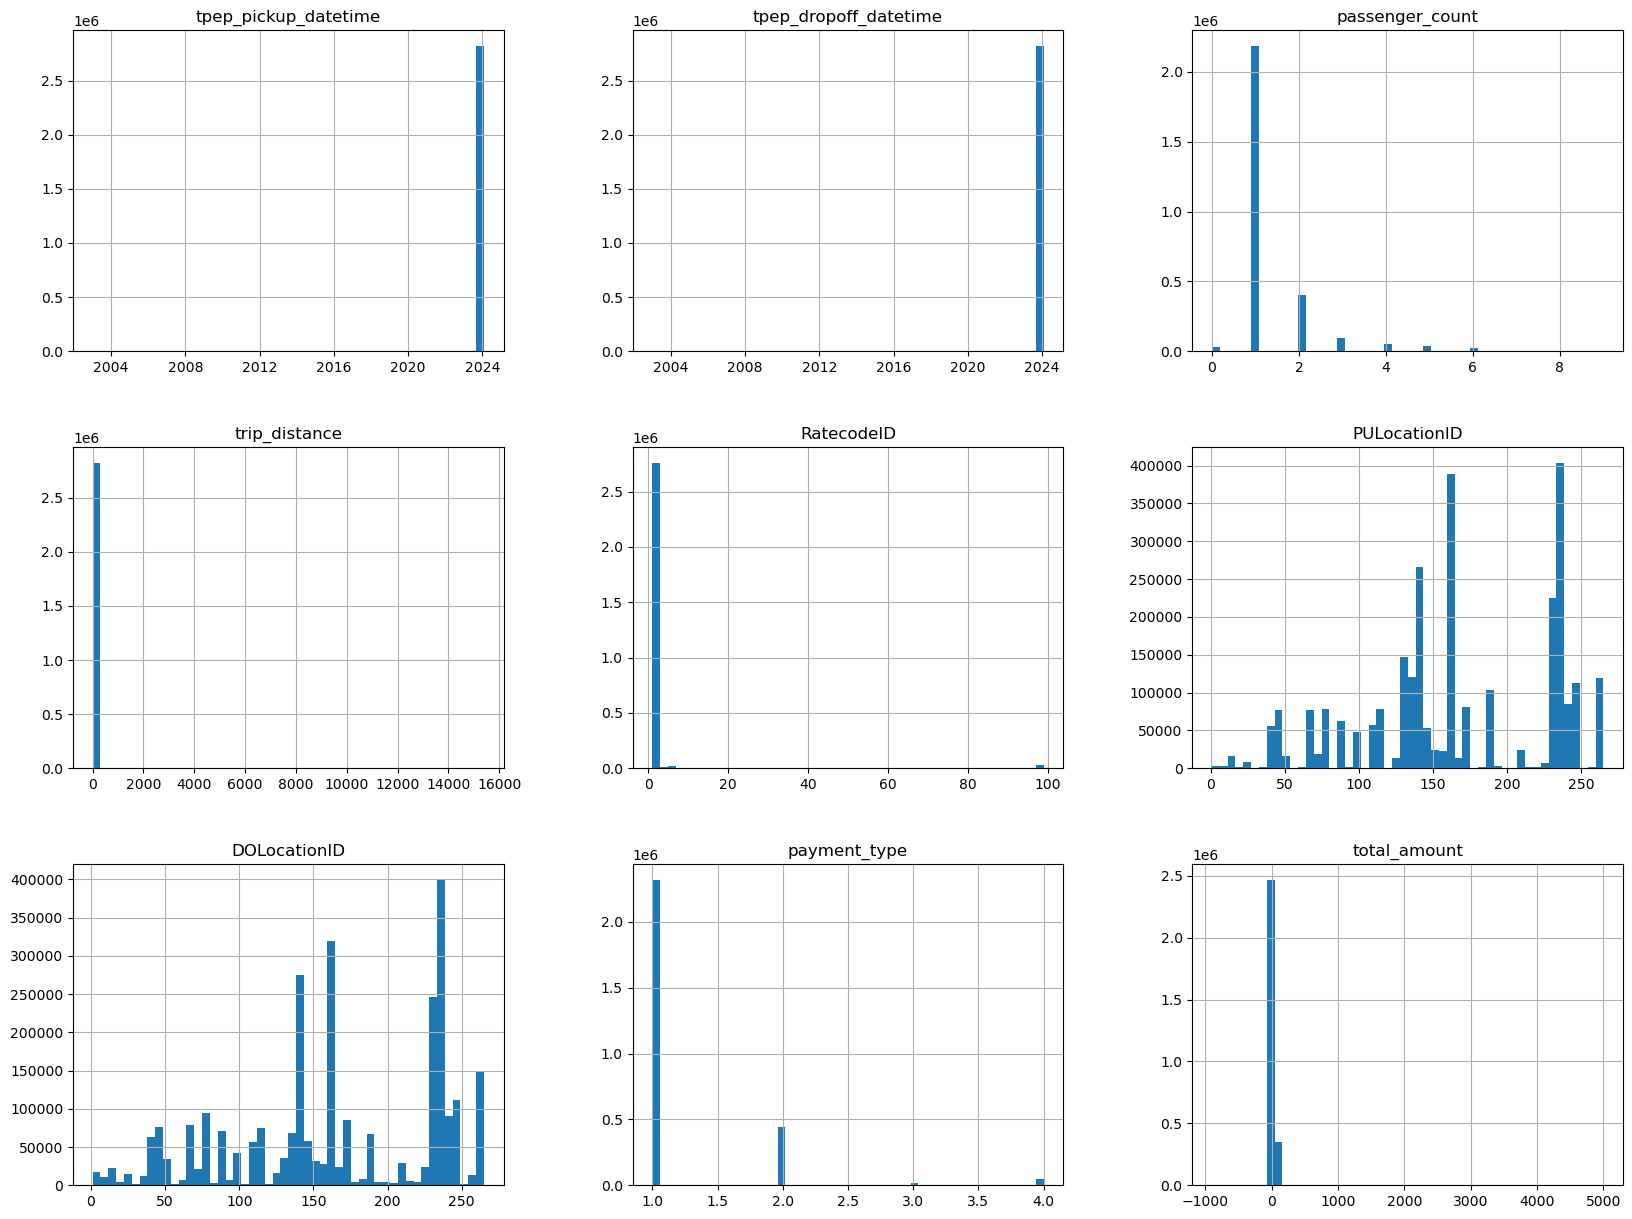

In [47]:
taxi_data.hist(bins=50, figsize=(20,15))

# 3. Data cleaning <a id='data_cleaning'></a>
[Back to top](#table_of_content)

array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

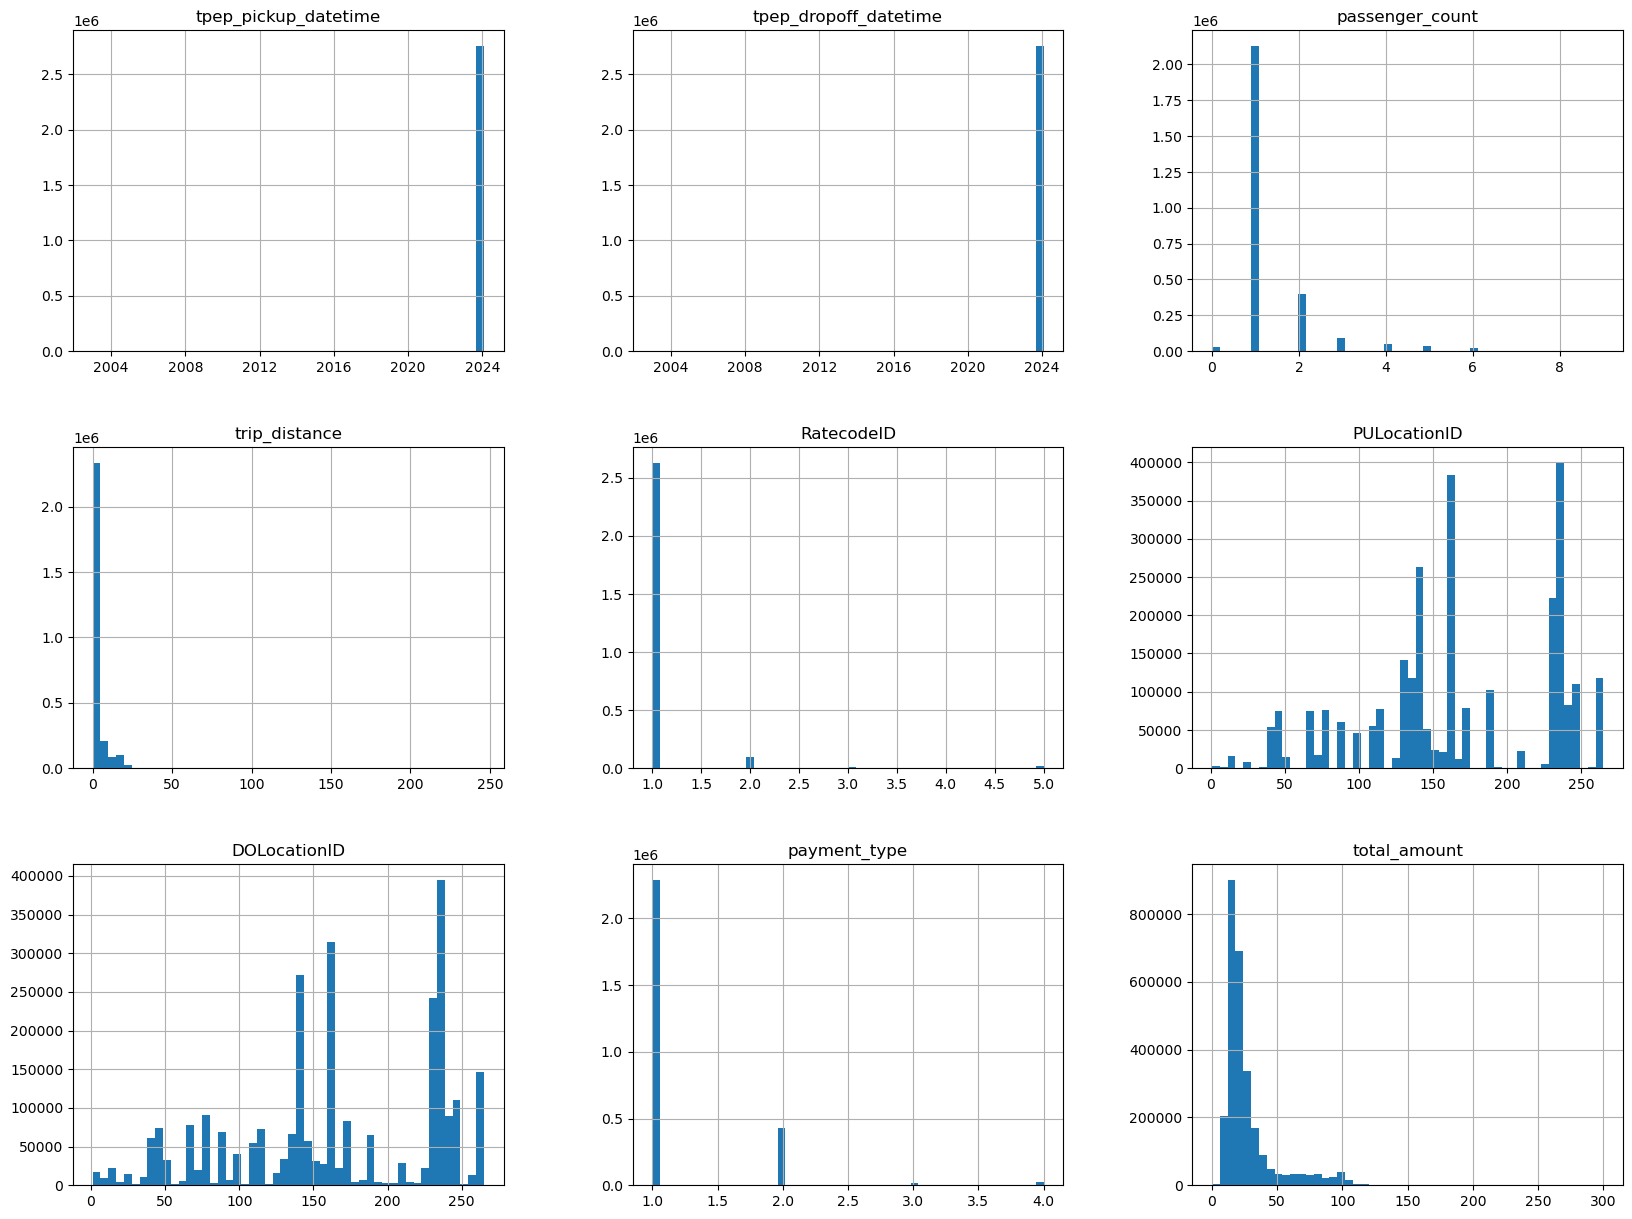

In [48]:
taxi_data_filtered = taxi_data[(taxi_data['trip_distance'] < 250) & (taxi_data['total_amount'] > 0) & (taxi_data['total_amount'] < 300) & (taxi_data['RatecodeID']<6)]
taxi_data_filtered.hist(bins=50, figsize=(20,15))

In [49]:
taxi_data_filtered.shape

(2759395, 9)

In [50]:
taxi_data_filtered.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64

In [51]:
taxi_data_prepared = taxi_data_filtered.copy()
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
total_amount                    float64
dtype: object

In [52]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,186,79,2,22.70
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,140,236,1,18.75
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,236,79,1,31.30
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,79,211,1,17.00
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,211,148,1,16.10


# 4. Data preparation <a id='data_preparation'></a>
[Back to top](#table_of_content)

In [53]:
taxi_data_prepared['transaction_date'] = taxi_data_prepared['tpep_pickup_datetime'].dt.date
taxi_data_prepared['transaction_year'] = taxi_data_prepared['tpep_pickup_datetime'].dt.year
taxi_data_prepared['transaction_month'] = taxi_data_prepared['tpep_pickup_datetime'].dt.month
taxi_data_prepared['transaction_day'] = taxi_data_prepared['tpep_pickup_datetime'].dt.day
taxi_data_prepared['transaction_hour'] = taxi_data_prepared['tpep_pickup_datetime'].dt.hour
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,186,79,2,22.70,2024-01-01,2024,1,1,0
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,140,236,1,18.75,2024-01-01,2024,1,1,0
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,236,79,1,31.30,2024-01-01,2024,1,1,0
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,79,211,1,17.00,2024-01-01,2024,1,1,0
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,211,148,1,16.10,2024-01-01,2024,1,1,0


In [54]:
taxi_data_prepared[taxi_data_prepared['transaction_year'] != 2024].shape

(14, 14)

In [55]:
taxi_data_prepared[taxi_data_prepared['transaction_year'] != 2024]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
256,2023-12-31 23:56:46,2024-01-01 00:12:06,2.0,2.38,1.0,236,142,1,21.60,2023-12-31,2023,12,31,23
369,2023-12-31 23:39:17,2023-12-31 23:42:00,2.0,0.47,1.0,90,68,1,10.10,2023-12-31,2023,12,31,23
753,2023-12-31 23:41:02,2023-12-31 23:48:03,1.0,0.40,1.0,246,246,2,12.20,2023-12-31,2023,12,31,23
2210,2023-12-31 23:57:17,2024-01-01 00:01:50,1.0,0.53,1.0,144,211,1,12.96,2023-12-31,2023,12,31,23
2615,2023-12-31 23:56:45,2024-01-01 00:00:28,1.0,0.97,1.0,163,237,1,13.50,2023-12-31,2023,12,31,23
2985,2023-12-31 23:49:12,2024-01-01 00:04:32,1.0,3.14,1.0,234,237,1,28.60,2023-12-31,2023,12,31,23
3176,2023-12-31 23:47:28,2023-12-31 23:57:07,2.0,1.44,1.0,68,137,1,18.84,2023-12-31,2023,12,31,23
4137,2023-12-31 23:58:35,2024-01-01 00:13:06,6.0,8.39,1.0,138,217,2,42.35,2023-12-31,2023,12,31,23
4142,2023-12-31 23:58:37,2024-01-01 00:08:37,2.0,0.59,1.0,161,170,1,18.75,2023-12-31,2023,12,31,23
8628,2023-12-31 23:54:27,2024-01-01 00:13:12,1.0,7.70,1.0,229,244,1,45.72,2023-12-31,2023,12,31,23


In [56]:
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_year'] == 2024]

In [57]:
categorical_columns = ['PULocationID', 'transaction_date', 'transaction_day', 'transaction_hour']
numerical_columns = ['trip_distance', 'total_amount']
all_needed_columns = categorical_columns + numerical_columns

In [58]:
main_taxi_data = taxi_data_prepared[all_needed_columns]
main_taxi_data.head()

,PULocationID,transaction_date,transaction_day,transaction_hour,trip_distance,total_amount
0,186,2024-01-01,1,0,1.72,22.70
1,140,2024-01-01,1,0,1.80,18.75
2,236,2024-01-01,1,0,4.70,31.30
3,79,2024-01-01,1,0,1.40,17.00
4,211,2024-01-01,1,0,0.80,16.10


In [59]:
taxi_grouped_by_region = main_taxi_data.groupby(categorical_columns).mean().reset_index()
taxi_grouped_by_region['count_of_transactions'] = main_taxi_data.groupby(categorical_columns).count().reset_index()['total_amount']
taxi_grouped_by_region


,PULocationID,transaction_date,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2024-01-01,1,5,0.000000,109.200000,1
1,1,2024-01-01,1,6,0.020000,76.000000,3
2,1,2024-01-01,1,13,0.000000,108.983333,3
3,1,2024-01-01,1,14,0.001667,85.680000,6
4,1,2024-01-01,1,15,0.000000,145.620000,2
...,...,...,...,...,...,...,...
58995,265,2024-01-31,31,17,2.800000,148.625000,4
58996,265,2024-01-31,31,18,0.000000,201.000000,1
58997,265,2024-01-31,31,19,2.880000,164.985000,2
58998,265,2024-01-31,31,20,0.025000,124.000000,2


# 5. Benchmark model <a id='benchmark_model'></a>
[Back to top](#table_of_content)

In [60]:
data_for_benchmark_model = taxi_grouped_by_region.copy()

In [61]:
input_features = ['PULocationID', 'transaction_day', 'transaction_hour', 'trip_distance']
target_feature = ['total_amount']

### 5.1. Train-test split

In [62]:
from sklearn.model_selection import train_test_split

X_bench = data_for_benchmark_model[input_features]
y_bench = data_for_benchmark_model[target_feature]

# One hot encoding, this line would be needed if we had categorical data
#X_bench = pd.get_dummies(X_bench)

X_train_bench, X_test_bench, y_train_bench, y_test_bench = train_test_split(X_bench, y_bench, test_size=0.2, random_state=42)

### 5.2. Fit a model(DecisionTree) to the data

In [63]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_bench, y_train_bench)

DecisionTreeRegressor(max_depth=10)

### 5.3. Model evaluation

In [64]:
y_pred_bench = tree.predict(X_test_bench)

import sklearn.metrics as metrics

print(f'mean absolute error: {metrics.mean_absolute_error(y_test_bench, y_pred_bench)}')
print(f'mean squared error: {metrics.mean_squared_error(y_test_bench, y_pred_bench)}')
print(f'r2 score: {metrics.r2_score(y_test_bench, y_pred_bench)}')

mean absolute error: 6.291941455653714
mean squared error: 207.9575624216621
r2 score: 0.6017785033305543


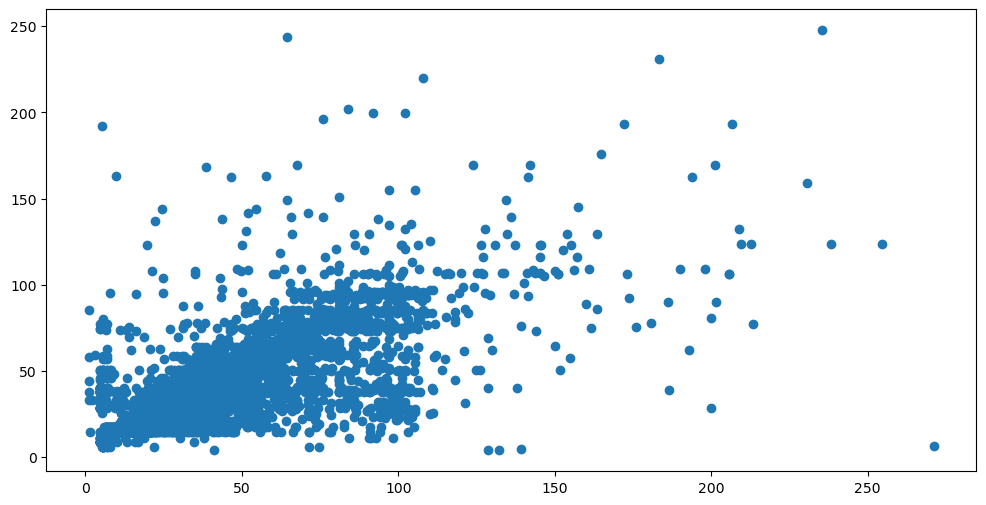

In [65]:
ax, figure = plt.subplots(figsize=(12, 6))
plt.scatter(y_test_bench, y_pred_bench) 
plt.show()

Could this be too good to be true?

### 5.4. Fixing problems
The problem is that trip_distance depends on total_amount, creating a strong correlation in the results. Moreover, this is not a value that the company would typically have beforehand

In [66]:
input_features = ['PULocationID', 'transaction_day', 'transaction_hour']
target_feature = ['total_amount']

from sklearn.model_selection import train_test_split

X_bench = data_for_benchmark_model[input_features]
y_bench = data_for_benchmark_model[target_feature]

# One hot encoding, this line would be needed if we had categorical data
#X_bench = pd.get_dummies(X_bench)

X_train_bench, X_test_bench, y_train_bench, y_test_bench = train_test_split(X_bench, y_bench, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_bench, y_train_bench)

y_pred_bench = tree.predict(X_test_bench)

import sklearn.metrics as metrics

print(f'mean absolute error: {metrics.mean_absolute_error(y_test_bench, y_pred_bench)}')
print(f'mean squared error: {metrics.mean_squared_error(y_test_bench, y_pred_bench)}')
print(f'r2 score: {metrics.r2_score(y_test_bench, y_pred_bench)}')

mean absolute error: 9.757298047280731
mean squared error: 336.12910364880975
r2 score: 0.3563406246425339


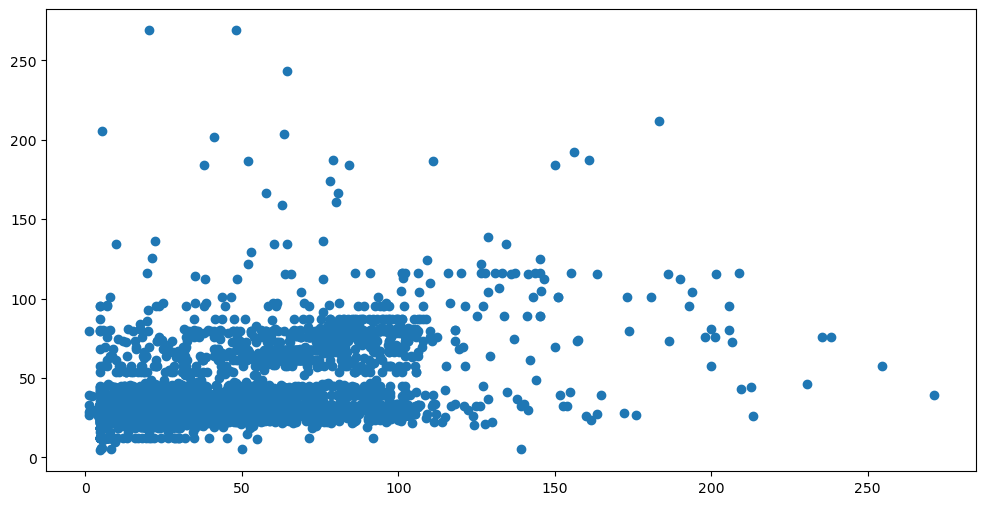

In [67]:
ax, figure = plt.subplots(figsize=(12, 6))
plt.scatter(y_test_bench, y_pred_bench) 
plt.show()

# 6. Feature Engineering <a id='feature_engineering'></a>
[Back to top](#table_of_content)